Questão 26

In [1]:
import numpy as np
from nltk.tokenize import  word_tokenize 
from fuzzywuzzy import fuzz as fuzzywuzzy_fuzz, process as fuzzywuzzy_process
from rapidfuzz import fuzz as rapidfuzz_fuzz, process as rapidfuzz_process
import Levenshtein
import pandas as pd
from timeit import default_timer as timer
from functools import wraps
import ipywidgets as widgets
import gensim

In [2]:
text = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',]

In [3]:
sentences = []
word_set = []
 
for sent in text:
    x = [i.lower() for  i in word_tokenize(sent) if i.isalpha()]
    sentences.append(x)
    for word in x:
        if word not in word_set:
            word_set.append(word)

In [4]:
word_set = set(word_set)
total_documents = len(sentences)
word_set

{'and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this'}

In [5]:
index_dict = {}
i = 0
for word in word_set:
    index_dict[word] = i
    i += 1
index_dict

{'is': 0,
 'second': 1,
 'first': 2,
 'document': 3,
 'third': 4,
 'one': 5,
 'and': 6,
 'the': 7,
 'this': 8}

In [6]:
def count_dict(sentences):
    word_count = {}
    for word in word_set:
        word_count[word] = 0
        for sent in sentences:
            if word in sent:
                word_count[word] += 1
    return word_count
 
word_count = count_dict(sentences)
word_count

{'is': 4,
 'second': 1,
 'first': 2,
 'document': 3,
 'third': 1,
 'one': 1,
 'and': 1,
 'the': 4,
 'this': 4}

In [7]:
# termo de frequencia == TF
def termfreq(document, word):
    N = len(document)
    occurance = len([token for token in document if token == word])
    return occurance/N

In [8]:
# IDF
def inverse_doc_freq(word):
    try:
        word_occurance = word_count[word] + 1
    except:
        word_occurance = 1
    return np.log(total_documents/word_occurance)

In [9]:
def tf_idf(sentence):
    tf_idf_vec = np.zeros((len(word_set),))
    for word in sentence:
        tf = termfreq(sentence,word)
        idf = inverse_doc_freq(word)
         
        value = tf*idf
        tf_idf_vec[index_dict[word]] = value 
    return tf_idf_vec

Questão 27

In [10]:
vectors = []
for sent in sentences:
    vec = tf_idf(sent)
    vectors.append(vec)
 
print(vectors[0])

[-0.04462871  0.          0.05753641  0.          0.          0.
  0.         -0.04462871 -0.04462871]


Questão 28

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(X.shape)
print(X)

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
(4, 9)
  (0, 1)	0.46979138557992045
  (0, 2)	0.5802858236844359
  (0, 6)	0.38408524091481483
  (0, 3)	0.38408524091481483
  (0, 8)	0.38408524091481483
  (1, 5)	0.5386476208856763
  (1, 1)	0.6876235979836938
  (1, 6)	0.281088674033753
  (1, 3)	0.281088674033753
  (1, 8)	0.281088674033753
  (2, 4)	0.511848512707169
  (2, 7)	0.511848512707169
  (2, 0)	0.511848512707169
  (2, 6)	0.267103787642168
  (2, 3)	0.267103787642168
  (2, 8)	0.267103787642168
  (3, 1)	0.46979138557992045
  (3, 2)	0.5802858236844359
  (3, 6)	0.38408524091481483
  (3, 3)	0.38408524091481483
  (3, 8)	0.38408524091481483


Questão 29

A contagem de palavras pode ser mais eficaz que o TF-IDF em problemas onde a frequência absoluta das palavras é mais informativa do que a sua frequência relativa. Por exemplo, em tarefas como classificação de documentos, se a importância reside na presença ou ausência de palavras específicas, a contagem de palavras pode ser mais apropriada do que o TF-IDF, que leva em consideração a frequência relativa ponderada.

Questão 30

In [12]:
def levenshtein_distance(a: str, b: str, verbose: bool = False) -> int:
    m, n = len(a), len(b)
    d = np.zeros((m+1, n+1), dtype=int)  # d[i,j] = levenshtein_distance(a[:i], b[:j])
        
    # when the other string is empty, distance is length of non-empty string
    for i in range(m+1): d[i, 0] = i
    for i in range(n+1): d[0, i] = i
    
    for j in range(1, n+1):
        for i in range(1, m+1):
            cost = 1 if a[i-1] != b[j-1] else 0
            d[i, j] = min(d[i-1, j-1] + cost,   # substitute         ↘
                          d[i, j-1]   + 1,      # delete from B      →
                          d[i-1, j]   + 1)      # insert into B      ↓
    
    if verbose: print(d)
    return d[m, n]

In [13]:
levenshtein_distance('gato', 'rato')

1

In [14]:
levenshtein_distance('cat', 'wildcat')

4

Com levenshtein podemos abordar Verificação ortográfica, Análise de DNA e Sistemas de sugestão.

Questão 31

In [15]:
def print_timing(f):
    @wraps(f)
    def inner(*args, **kwargs):
        t0 = timer()
        try:
            return f(*args, **kwargs)
        finally:
            print(f"\n{f.__name__} finished in {1e3*(timer()-t0):.1f} ms")
    return inner

In [16]:
df = pd.read_csv("/kaggle/input/amazon-books-reviews/Books_rating.csv")
df.head(5)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [17]:
words_raw = df["review/text"]
words = words_raw.iloc[0:10000]
words

0       This is only for Julie Strain fans. It's a col...
1       I don't care much for Dr. Seuss but after read...
2       If people become the books they read and if "t...
3       Theodore Seuss Geisel (1904-1991), aka &quot;D...
4       Philip Nel - Dr. Seuss: American IconThis is b...
                              ...                        
9995    Many books I buy are to keep my gradeschool gr...
9996    awesome pics beleive it there int he sea we kn...
9997    This book has wonderful pictures but I think i...
9998    we bought this book first at the monterey aqua...
9999    A very good book. Nice clear pictures and diag...
Name: review/text, Length: 10000, dtype: object

In [18]:
sentences = []
word_set = []
 
for sent in words:
    x = [i.lower() for  i in word_tokenize(sent) if i.isalpha()]
    sentences.append(x)
    for word in x:
        if word not in word_set:
            word_set.append(word)

In [19]:
word_set = set(word_set)
word_set

{'simulated',
 'crosses',
 'giordano',
 'cloak',
 'motel',
 'consumed',
 'powerhouse',
 'nerds',
 'playfully',
 'ethnic',
 'tends',
 'anticpate',
 'reaches',
 'motoo',
 'cream',
 'rekindle',
 'storylines',
 'hubris',
 'amoco',
 'acceptance',
 'vengeful',
 'nave',
 'shackle',
 'interactions',
 'sunshine',
 'secularize',
 'simplest',
 'travaler',
 'victories',
 'logical',
 'undemanding',
 'artful',
 'proclaimed',
 'acor',
 'bombardment',
 'shippers',
 'pride',
 'nordic',
 'vienna',
 'monsters',
 'scarred',
 'sucess',
 'cigar',
 'safety',
 'stove',
 'toil',
 'characterizes',
 'perk',
 'citations',
 'dislikable',
 'ramifications',
 'litte',
 'coworker',
 'casual',
 'condemnation',
 'red',
 'dragon',
 'sturctured',
 'eliding',
 'gene',
 'broncos',
 'ticket',
 'wienbat',
 'fetishism',
 'requisite',
 'discourse',
 'blechhh',
 'domains',
 'hygeine',
 'instance',
 'palanese',
 'atleast',
 'crashlanderbook',
 'aires',
 'diluted',
 'reckon',
 'scholorship',
 'referencethe',
 'workflows',
 'experi

In [20]:
@print_timing
def interact_words(input_text):
    if not input_text: return
    for word, score, _ in rapidfuzz_process.extract(input_text, word_set, limit=10):
        print(f"{word:60}{score:3.2f}")


In [21]:
interact_words("booke")

booked                                                      90.91
b                                                           90.00
ebookery                                                    90.00
ok                                                          90.00
boo                                                         90.00
e                                                           90.00
o                                                           90.00
bookespecially                                              90.00
k                                                           90.00
book                                                        88.89

interact_words finished in 78.3 ms


In [22]:
interact_words("papwr")

p                                                           90.00
pap                                                         90.00
ap                                                          90.00
pw                                                          90.00
w                                                           90.00
r                                                           90.00
a                                                           90.00
pawar                                                       80.00
paper                                                       80.00
paw                                                         75.00

interact_words finished in 66.3 ms


Questão 32

In [23]:
df.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [24]:
df.shape

(3000000, 10)

In [25]:
df = df.rename(columns={"review/text": "review"})
df = df.iloc[0:10000]
df

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...
...,...,...,...,...,...,...,...,...,...,...
9995,0714843016,Fish Face,NaN,AKI17M38FBHO3,Mary Ann Payne,0/0,5.0,1253750400,fish face,Many books I buy are to keep my gradeschool gr...
9996,0714843016,Fish Face,NaN,A23RC1806MU14U,"Jay E. Schwartz ""livediver""",0/0,5.0,1215648000,fish book faces,awesome pics beleive it there int he sea we kn...
9997,0714843016,Fish Face,NaN,A1T38WUVN5DHOW,A. Gorozdos,0/0,3.0,1181433600,Great pictures!,This book has wonderful pictures but I think i...
9998,0714843016,Fish Face,NaN,A3KPR36IFBPAPE,G'town mom,0/0,5.0,1168300800,"best book ever, picture or otherwise",we bought this book first at the monterey aqua...


In [26]:
review_text = df.review.apply(gensim.utils.simple_preprocess)
review_text

0       [this, is, only, for, julie, strain, fans, it,...
1       [don, care, much, for, dr, seuss, but, after, ...
2       [if, people, become, the, books, they, read, a...
3       [theodore, seuss, geisel, aka, quot, dr, seuss...
4       [philip, nel, dr, seuss, american, iconthis, i...
                              ...                        
9995    [many, books, buy, are, to, keep, my, gradesch...
9996    [awesome, pics, beleive, it, there, int, he, s...
9997    [this, book, has, wonderful, pictures, but, th...
9998    [we, bought, this, book, first, at, the, monte...
9999    [very, good, book, nice, clear, pictures, and,...
Name: review, Length: 10000, dtype: object

In [27]:
review_text.loc[33]

['this',
 'is',
 'wonderful',
 'book',
 'that',
 'will',
 'keep',
 'you',
 'guessing',
 'it',
 'is',
 'rare',
 'to',
 'find',
 'book',
 'that',
 'will',
 'make',
 'you',
 'laugh',
 'and',
 'cry',
 'at',
 'the',
 'same',
 'time',
 'and',
 'still',
 'leave',
 'you',
 'wondering',
 'what',
 'will',
 'happen',
 'next',
 'what',
 'was',
 'even',
 'more',
 'amazing',
 'about',
 'it',
 'is',
 'the',
 'fact',
 'that',
 'it',
 'is',
 'written',
 'in',
 'such',
 'poetic',
 'way',
 'this',
 'is',
 'rare',
 'find',
 'and',
 'look',
 'forward',
 'to',
 'the',
 'next',
 'book',
 'written',
 'by',
 'veronica',
 'haddon']

In [28]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    workers=4,
)

In [29]:
model.build_vocab(review_text, progress_per=1000)

In [30]:
model.epochs

5

In [31]:
model.corpus_count

10000

In [32]:
model.train(review_text, total_examples=model.corpus_count, epochs=model.epochs)

(5198842, 6944455)

In [33]:
model.wv.most_similar("book")

[('novel', 0.7110453844070435),
 ('review', 0.6888304948806763),
 ('it', 0.6579707264900208),
 ('definitely', 0.6550307869911194),
 ('fun', 0.64691162109375),
 ('series', 0.6306374669075012),
 ('stuff', 0.6304820775985718),
 ('edition', 0.6188965439796448),
 ('story', 0.6165668964385986),
 ('play', 0.6148766279220581)]

In [34]:
model.wv.similarity(w1="story", w2="good")

0.29074088

In [35]:
model.wv.similarity(w1="great", w2="good")

0.73906595

Questão 33

In [36]:
import matplotlib.pyplot as plt


def plot_word_similarity(palavra):

    similar_words = [palavra]

    similar_words += [word for word, _ in model.wv.most_similar(palavra)]


    vectors = [model.wv[word] for word in similar_words]


    from sklearn.decomposition import TruncatedSVD

    svd = TruncatedSVD(n_components=2, random_state=42)

    word_vectors_2d = svd.fit_transform(vectors)


    plt.figure(figsize=(8, 8))

    plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], marker='o')


    for i, word in enumerate(similar_words):

        plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=12)


    plt.xlabel('Dimension 1')

    plt.ylabel('Dimension 2')

    plt.title(f'Word Similarity Plot for "{palavra}"')

    plt.grid(True)
plt.show()

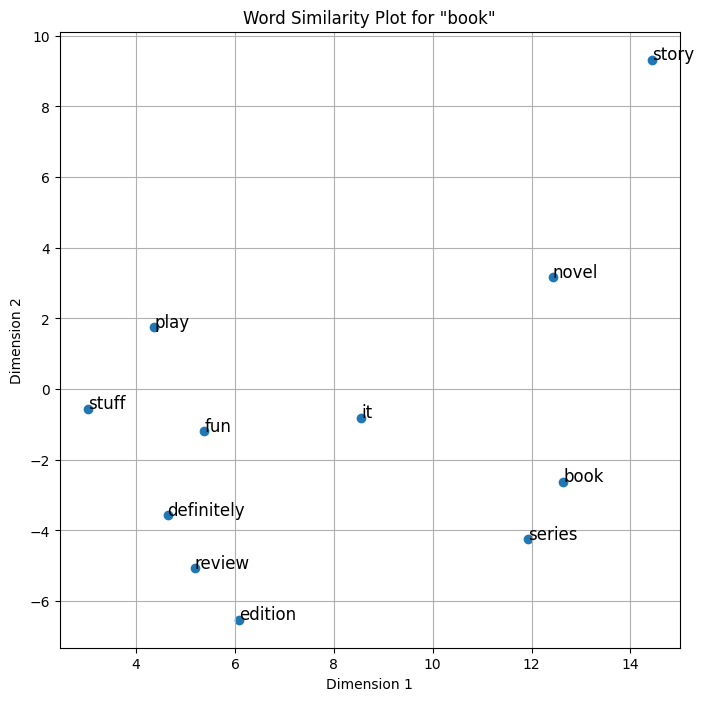

In [37]:
plot_word_similarity("book")

Questão 34

In [38]:
model.wv.most_similar("book", topn=100)

[('novel', 0.7110453844070435),
 ('review', 0.6888304948806763),
 ('it', 0.6579707264900208),
 ('definitely', 0.6550307869911194),
 ('fun', 0.64691162109375),
 ('series', 0.6306374669075012),
 ('stuff', 0.6304820775985718),
 ('edition', 0.6188965439796448),
 ('story', 0.6165668964385986),
 ('play', 0.6148766279220581),
 ('classic', 0.6138895153999329),
 ('books', 0.6076084971427917),
 ('booklet', 0.6034826040267944),
 ('digits', 0.596922755241394),
 ('title', 0.5910675525665283),
 ('boring', 0.5858522653579712),
 ('enjoyable', 0.5814443230628967),
 ('text', 0.5780662894248962),
 ('probably', 0.5736348032951355),
 ('spooked', 0.5731341242790222),
 ('godsend', 0.5713021159172058),
 ('trilogy', 0.5702744126319885),
 ('version', 0.5645819902420044),
 ('information', 0.5634092092514038),
 ('cover', 0.5623604655265808),
 ('cornwell', 0.5612978935241699),
 ('work', 0.5606725811958313),
 ('illustrations', 0.5580881834030151),
 ('ending', 0.5550395846366882),
 ('pages', 0.554271936416626),
 ('r

In [39]:
model.wv.most_similar("book","book", topn=100)

[('flings', 0.0),
 ('territorial', 0.0),
 ('releases', 0.0),
 ('motherland', 0.0),
 ('spinach', 0.0),
 ('flour', 0.0),
 ('irksome', 0.0),
 ('consistantly', 0.0),
 ('contests', 0.0),
 ('overlong', 0.0),
 ('kenny', 0.0),
 ('thoughful', 0.0),
 ('tumultuous', 0.0),
 ('beleivable', 0.0),
 ('lbw', 0.0),
 ('methane', 0.0),
 ('prudish', 0.0),
 ('landlord', 0.0),
 ('schemers', 0.0),
 ('negotiate', 0.0),
 ('clips', 0.0),
 ('angrily', 0.0),
 ('publicized', 0.0),
 ('stalked', 0.0),
 ('typeface', 0.0),
 ('jesse', 0.0),
 ('crosshairs', 0.0),
 ('imaginings', 0.0),
 ('stained', 0.0),
 ('belittled', 0.0),
 ('unreasonable', 0.0),
 ('collectibles', 0.0),
 ('honda', 0.0),
 ('cadenced', 0.0),
 ('pribeaux', 0.0),
 ('bd', 0.0),
 ('reunion', 0.0),
 ('barred', 0.0),
 ('zinger', 0.0),
 ('purposefully', 0.0),
 ('backwater', 0.0),
 ('biotech', 0.0),
 ('detests', 0.0),
 ('tutelage', 0.0),
 ('manufacturing', 0.0),
 ('homeowner', 0.0),
 ('aberration', 0.0),
 ('scars', 0.0),
 ('erupts', 0.0),
 ('netgalley', 0.0),
 ('

parte dela faz sentido porem o resto não faz muito sentido, isso ocorre pois a base de dados pode não ter as palavras mais ideais e gera limitação e pouca variedade de palavras 

Questão 34

In [4]:
import gensim.downloader 

In [5]:
w2v_model_pre = gensim.downloader.load('glove-wiki-gigaword-50') 

In [6]:
w2v_model_pre.most_similar("book", topn=100) 

[('books', 0.9047631025314331),
 ('story', 0.8662747144699097),
 ('novel', 0.8550738096237183),
 ('writing', 0.843974232673645),
 ('published', 0.8439115881919861),
 ('biography', 0.8398316502571106),
 ('author', 0.8371229767799377),
 ('wrote', 0.8293616771697998),
 ('written', 0.8216683864593506),
 ('titled', 0.8155251145362854),
 ('stories', 0.814926028251648),
 ('fiction', 0.8142493963241577),
 ('describes', 0.7974791526794434),
 ('essay', 0.7949015498161316),
 ('entitled', 0.7934672832489014),
 ('illustrated', 0.7931669354438782),
 ('read', 0.7886687517166138),
 ('autobiography', 0.7880682349205017),
 ('memoir', 0.7875195741653442),
 ('publication', 0.7825647592544556),
 ('novels', 0.781981348991394),
 ('poetry', 0.7757318019866943),
 ('collection', 0.7742505669593811),
 ('magazine', 0.7721923589706421),
 ('write', 0.7649295926094055),
 ('page', 0.7613701224327087),
 ('publishing', 0.7557433247566223),
 ('essays', 0.749815046787262),
 ('edited', 0.7481822967529297),
 ('anthology', 

Questão 36

Enquanto o TF-IDF é baseado em estatísticas simples, o Word2Vec é capaz de entender o significado e a semelhança entre palavras com base no contexto em que aparecem.

Questão 37

A principal diferença entre Word2Vec e FastText está na forma como tratam as palavras. Enquanto o Word2Vec representa as palavras como vetores únicos, o FastText quebra as palavras em subpalavras (n-gramas) e representa cada subpalavra como um vetor. Isso permite que o FastText capture informações mais detalhadas, especialmente para palavras raras ou compostas

Questão 38

O FastText é especialmente adequado para problemas em que a morfologia das palavras é relevante, como tarefas em idiomas com muitas palavras compostas, derivadas ou aglutinativas. Ele é eficaz em lidar com palavras raras e capturar informações detalhadas sobre subpalavras. Portanto, é útil em cenários onde a análise subpalavra ou a estrutura morfológica são importantes, como:
* Idiomas morfologicamente ricos: Em línguas onde as palavras têm muitas formas diferentes devido a conjugações, derivações ou composições.
* Recuperação de Informações: Em aplicações de recuperação de informações, onde a compreensão da morfologia pode melhorar a correspondência de consultas.
* Processamento de Linguagem Natural (PLN) geral: Em tarefas de PLN, como análise de sentimento, classificação de texto ou similar, onde a morfologia das palavras é uma parte significativa da semântica.
* Tratamento de palavras raras: Para lidar eficazmente com palavras raras ou fora do vocabulário.